# Proyek Analisis Data: [Data Wisata Dataset]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pengaruh cuaca dan musim, terhadap jumlah penyewaan sepeda?

- Pertanyaan 2 : Pada cuaca dan musim apa, penyewaan sepeda tertingi dan terendah pada tahun 2011 hingga 2012?

## Import Semua Packages/Library yang Digunakan

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [55]:
import csv
data_df = pd.read_csv("data_wisata.csv", on_bad_lines="skip")

data_df.head() #Menampilkan 5 baris utama dari file day.csv

,No,Nama Tempat,Kategori,Koordinat,Latitude,Longitude,Alamat,Deskripsi
0,1,Anai Resort (Malimbu Anai),Hotel,S0 29 57.2 E100 20 04.9,-0.499222,100.334694,"Kandang Ampek, Lembah Anai.",Informasi tidak ada
1,2,Bambu Hotel,Hotel,S0 14 06.0 E100 38 26.5,-0.235000,100.640694,Jl. M. Yamin no. 23 Labuah Basilang.,Informasi tidak ada
2,3,Lembah Echo Hotel,Hotel,S0 06 23.0 E100 39 54.1,-0.106389,100.665028,"Desa Lubuk Limpato, Nagari Tarantang, Kecamata...",Informasi tidak ada
3,4,Hotel Pasir Panjang,Hotel,S0 17 28.7 E100 13 38.0,-0.291306,100.227222,"Jl. Raya Maninjau - Bukittinggi, Maninjau, Sum...",Informasi tidak ada
4,5,Pantai Arta,Pantai,S0 30 30.7 E100 02 49.2,-0.508528,100.046999,"Jl. Pariaman Siku, Sungai Limau.",Informasi tidak ada


### Assessing Data

In [56]:
data_df.info() #Melihat ringkasan file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   No           783 non-null    int64 
 1   Nama Tempat  783 non-null    object
 2   Kategori     783 non-null    object
 3   Koordinat    783 non-null    object
 4   Latitude     783 non-null    object
 5   Longitude    783 non-null    object
 6   Alamat       783 non-null    object
 7   Deskripsi    783 non-null    object
dtypes: int64(1), object(7)
memory usage: 49.1+ KB


In [57]:
print(data_df.isna().sum()) #Mengecek missing value

No             0
Nama Tempat    0
Kategori       0
Koordinat      0
Latitude       0
Longitude      0
Alamat         0
Deskripsi      0
dtype: int64


In [58]:
print("Mengecek jumlah duplikat: ", data_df.duplicated().sum()) #Mengecek jumlah duplikasi

Mengecek jumlah duplikat:  0


In [59]:
print(data_df.describe()) #Melihat ringkasan statistik

               No
count  783.000000
mean   437.424010
std    263.623446
min      1.000000
25%    196.500000
50%    416.000000
75%    670.500000
max    890.000000


In [61]:
#Simpan data yang sudah bersih ke file baru
data_df.to_csv("data_wisata_cleaned.csv", index=False)

print("✅ Data yang sudah dibersihkan telah disimpan sebagai 'data_wisata_cleaned.csv'")

✅ Data yang sudah dibersihkan telah disimpan sebagai 'data_wisata_cleaned.csv'


## Cleaning

In [65]:
#Hapus kolom "No"
data_df.drop(columns=["No"], inplace=True)

#Simpan perubahan
data_df.to_csv("data_wisata_cleaned.csv", index=False)

print("Kolom No berhasil dihapus")

Kolom No berhasil dihapus


In [67]:
#Tambahkan kolom nomor baru
data_df.insert(0, "No", range(1, len(data_df) + 1))

#Simpan kembali dengan nomor yang rapi
data_df.to_csv("data_wisata_cleaned.csv", index=False)

print("Kolom No berhasil ditambahkan")

Kolom No berhasil ditambahkan


## Exploratory Data Analysis (EDA)

In [62]:
data_df.describe(include="all") #Melihat statistik

,No,Nama Tempat,Kategori,Koordinat,Latitude,Longitude,Alamat,Deskripsi
count,783.000000,783,783,783,783,783,783,783
unique,NaN,676,136,662,541,555,546,458
top,NaN,Bukit Langkisau,Pantai,Informasi tidak ada,-8.000000,116.000000,Informasi tidak ada,Informasi tidak ada
freq,NaN,2,79,6,111,49,40,290
mean,437.424010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,263.623446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,196.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,416.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,670.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
data_df.shape

(783, 8)

In [73]:
data_df["Kategori"]

,Kategori
0,Hotel
1,Hotel
2,Hotel
3,Hotel
4,Pantai
...,...
778,Bandar Udara
779,Terminal
780,Masjid
781,Masjid


## Visualization & Explanatory Analysis

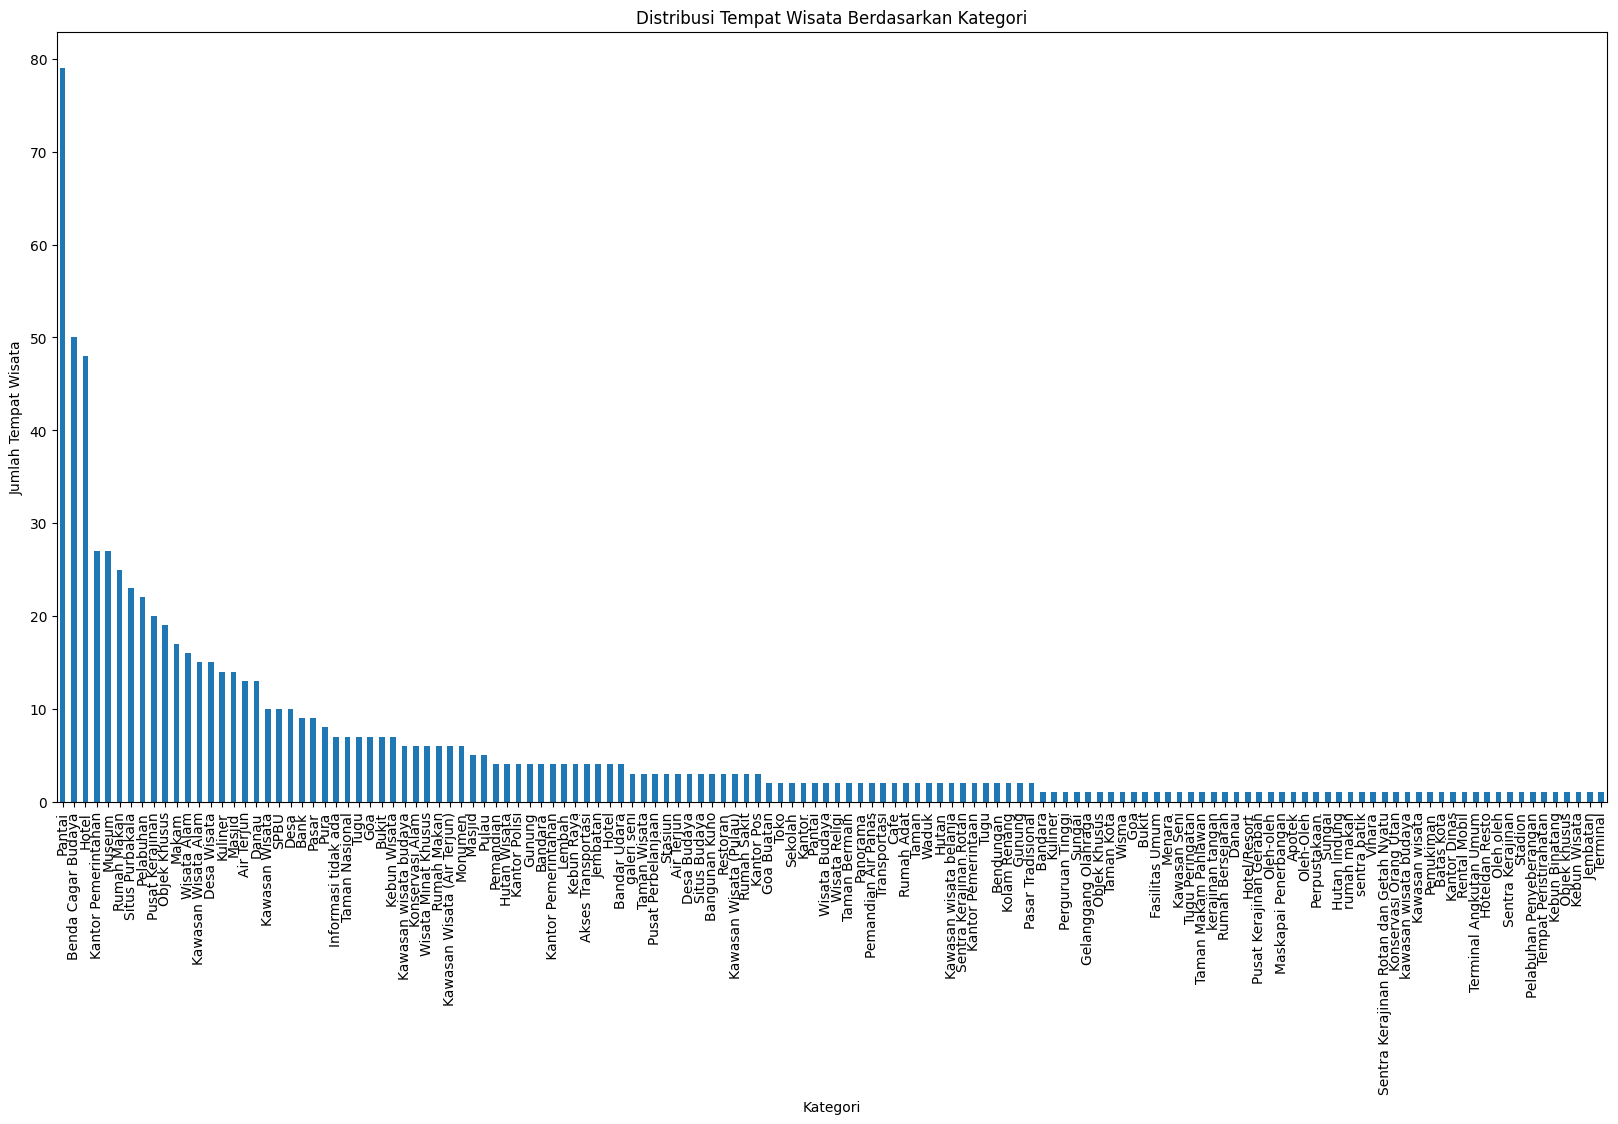

In [74]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 10))  #Ukuran lebar 20, tinggi 10
data_df["Kategori"].value_counts().plot(kind="bar")
plt.xlabel("Kategori")
plt.ylabel("Jumlah Tempat Wisata")
plt.title("Distribusi Tempat Wisata Berdasarkan Kategori")
plt.show()